# INFO 6105 Team 25 Project

# Title: European Soccer Prediction

#### Team Members:
<ol>
        <li>Akshita Ishvarbhai Barot; NUID: 002704943 </li>
        <li>Gauri Jaydeep Patole; NUID: 002700996 </li>
</ol>
     
#### Instructor: Dr. Handan Liu


## Table of Contents

<ul>
 <li>Data Wrangling</li>
 <li>Exploratory Data Analysis</li>
 <li>Feature Engineering</li>
 <li>Data Modeling</li>
 <li>Model Evaluation</li>
 <li>Conclusion</li>
</ul>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.pipeline import Pipeline, FeatureUnion 
#from sklearn.externals import joblib
import joblib
import sqlalchemy as sqla
#import py.xgboost.mutex as xgb
#from xgboost import XGBClassifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

### Loading the data from Sqlite3 Package

In [2]:
# Creating the connection to database

con = sqlite3.connect("database.sqlite") 
cursor = con.cursor() 

In [3]:
# Printing all tables present in database.sqlite 

for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"): 
    print(row) 

('sqlite_sequence',)
('Player_Attributes',)
('Player',)
('Match',)
('League',)
('Country',)
('Team',)
('Team_Attributes',)


In [4]:
# Read data into Dataframes from all available tables and retrive them

df_Country = pd.read_sql("Select  * from Country", con) 

df_League = pd.read_sql("Select  * from League", con) 

df_Match = pd.read_sql("Select  * from Match", con) 

df_Player = pd.read_sql("Select  * from Player", con) 

df_Player_Attributes = pd.read_sql("Select  * from Player_Attributes", con) 

df_Team = pd.read_sql("Select  * from Team", con) 

df_Team_Attributes = pd.read_sql("Select  * from Team_Attributes", con) 

### Data Wrangling

In [5]:
# Country Table

df_Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [6]:
df_Country.shape

(11, 2)

In [7]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [8]:
# League Table

df_League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [9]:
df_League.shape

(11, 3)

In [10]:
df_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [11]:
# Match Table

df_Match.shape

(25979, 115)

In [12]:
df_Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [13]:
df_Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [14]:
# Find the number of missing value

df_Match.isnull().sum().sum()

407395

In [15]:
# Number of missing values

df_Match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [16]:
# Player Table

df_Player.shape

(11060, 7)

In [17]:
df_Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [18]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [19]:
# Player Attribute Table

df_Player_Attributes.shape

(183978, 42)

In [20]:
df_Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
df_Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [22]:
# Team Table

df_Team.shape

(299, 5)

In [23]:
df_Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [24]:
df_Team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [25]:
# Team Attribute Table

df_Team_Attributes.shape

(1458, 25)

In [26]:
df_Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [27]:
df_Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [28]:
# Dropping columns that contains missing values

df_Match_copy = df_Match.copy()
df_Match_copy.dropna(axis='columns', inplace = True)

In [29]:
df_Match_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [30]:
df_Match_copy.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [31]:
# Converting the date column to datetime since it is an object with type String.

df_Match_copy['date'] = pd.to_datetime(df_Match_copy['date'])

In [32]:
# Adding another column along with the year column

df_Match_copy['year'] = df_Match_copy['date'].dt.year

In [33]:
# Divinding the 'season' column into 2 seperate columns as 'start_season' and 'end_season', and then dropping the 'season' column

start_season = df_Match_copy['season'].apply(lambda x: x.split("/")[0])
end_season = df_Match_copy['season'].apply(lambda x: x.split("/")[1])

df_Match_copy['start_season'] = start_season
df_Match_copy['end_season'] = end_season

df_Match_copy.drop(columns = ['season'], axis = 1, inplace = True)

In [34]:
# Merging the ids from other Dataframe inorder to change all the id columns in Match dataset

# Starting with the country_id

# Renaming the columns name to country_name and id to country_id
df_Country_copy = df_Country.copy()
df_Country_copy.rename(columns = {'name':'country_name', 'id': 'country_id'}, inplace = True)

# Applying inner merge with the Country table
df_Match_copy = df_Match_copy.merge(df_Country_copy, how = 'inner', left_on='country_id', right_on='country_id')

# Dropping the country_id
df_Match_copy.drop(columns =['country_id'], inplace = True)

# Checking the new Country Dataframe
df_Match_copy.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium


In [35]:
# Not modifying the League data and just copying it

df_League_copy = df_League.copy()

# Renaming the columns 'name' and 'id'
df_League_copy.rename(columns = {'name':'league_name', 'id': 'league_id'}, inplace = True)

# Applying inner merge with the League table
df_Match_copy = df_Match_copy.merge(df_League_copy, how = 'inner', left_on = 'league_id', right_on = 'league_id')

# Dropping country_id and league_id
df_Match_copy.drop(columns = ['league_id', 'country_id' ], inplace = True)

# Checking the new Match Dataframe
df_Match_copy.head()

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name
0,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium,Belgium Jupiler League
1,2,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium,Belgium Jupiler League
2,3,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium,Belgium Jupiler League
3,4,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium,Belgium Jupiler League
4,5,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium,Belgium Jupiler League


In [36]:
# Getting to know which teams played together

df_Team_copy = df_Team.copy()

# Dropping below tables
df_Team_copy.drop(columns = ['team_fifa_api_id', 'team_short_name', 'id'], axis = 1, inplace = True)

df_Team_copy.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [37]:
# Merging the home_team_id

# First merge
df_Match_copy = df_Match_copy.merge(df_Team_copy, how = 'inner', left_on = 'home_team_api_id', right_on = 'team_api_id')

df_Match_copy.rename(columns = {'team_long_name': 'home_team_name'}, inplace = True)

df_Match_copy.drop(columns= ['home_team_api_id', 'team_api_id'], axis = 1, inplace = True)

# Second merge
df_Match_copy = df_Match_copy.merge(df_Team_copy, how = 'left', left_on = 'away_team_api_id', right_on = 'team_api_id')

df_Match_copy.rename(columns = {'team_long_name': 'away_team_name'}, inplace = True)

df_Match_copy.drop(columns= ['team_api_id', 'away_team_api_id'], axis = 1, inplace = True)

# Checking the new dataframe
df_Match_copy.head()

,id,stage,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name
0,1,1,2008-08-17,492473,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,29,12,2008-11-15,492583,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare
2,47,14,2008-11-29,492651,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge
3,65,16,2008-12-13,492713,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi
4,94,19,2009-01-24,492805,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons


In [38]:
# Inorder to determine who wins or if there is a tie in a match, we will create a new column and create a function to determine the values

def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Tie'
    
df_Match_copy['winner'] = df_Match_copy[['home_team_goal', 'away_team_goal', 'home_team_name','away_team_name']].apply(winner, axis=1)

In [39]:
# Dropping 'stage' and 'match_api_id' and saving the data in a csv file

df_Match_copy.drop(['stage', 'match_api_id'], axis = 1, inplace =True)

df_Match_copy.to_csv('Matches_Clean_Data.csv', index = False)

pd.read_csv('Matches_Clean_Data.csv').head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winner
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In [40]:
df_Team_copy.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [41]:
# Finding duplicate teams

def unique_team_names():
    return df_Team_copy.team_long_name.value_counts()

unique_team_names()[:10]

Widzew Łódź                     2
Royal Excel Mouscron            2
Polonia Bytom                   2
Korona Kielce                   1
Termalica Bruk-Bet Nieciecza    1
Górnik Łęczna                   1
Zawisza Bydgoszcz               1
Pogoń Szczecin                  1
Podbeskidzie Bielsko-Biała      1
Zagłębie Lubin                  1
Name: team_long_name, dtype: int64

In [42]:
# Finding duplicate teams by Club names

df_Team_copy.team_long_name.value_counts()[df_Team_copy.team_long_name.value_counts()>=2]

Widzew Łódź             2
Royal Excel Mouscron    2
Polonia Bytom           2
Name: team_long_name, dtype: int64

In [43]:
df_Team_copy.query('team_long_name == "Widzew Łódź"')

,team_api_id,team_long_name
189,8244,Widzew Łódź
199,8024,Widzew Łódź


In [44]:
df_Team_copy.query('team_long_name == "Royal Excel Mouscron"')

,team_api_id,team_long_name
15,9996,Royal Excel Mouscron
24,274581,Royal Excel Mouscron


In [45]:
df_Team_copy.query('team_long_name == "Polonia Bytom"')

,team_api_id,team_long_name
182,8031,Polonia Bytom
183,8020,Polonia Bytom


In [46]:
# Since the fifa_api_id are same for each team, we can drop one of them

# Dropping the duplicate rows by index id
df_Team_copy.drop(index=[24,183,199], inplace = True)

In [47]:
# Checking if there are any duplicate names
unique_team_names()[:10]

KRC Genk                        1
CF Os Belenenses                1
Termalica Bruk-Bet Nieciecza    1
Górnik Łęczna                   1
Zawisza Bydgoszcz               1
Pogoń Szczecin                  1
Podbeskidzie Bielsko-Biała      1
Zagłębie Lubin                  1
Korona Kielce                   1
Cracovia                        1
Name: team_long_name, dtype: int64

In [48]:
df_Team_Attributes_copy = df_Team_Attributes.copy()

In [49]:
df_Team_Attributes_copy.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [50]:
# Merging the team attribute table with the team table


df_Team_Attributes_merged = df_Team_Attributes_copy.merge(df_Team, left_on= 'team_api_id', right_on= 'team_api_id')

# Dropping columns not required
df_Team_Attributes_merged.drop(columns = ['team_fifa_api_id_x','id_y','team_fifa_api_id_y'], inplace = True)

# Renaming the columns which will get appended after merging
df_Team_Attributes_merged.rename(columns = {'id_x': 'id', 'team_fifa_api_id_x': 'team_fifa_api_id'}, inplace = True)

df_Team_Attributes_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


In [51]:
df_Team_Attributes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

In [52]:
# Converting the date column
df_Team_Attributes_merged['date'] = pd.to_datetime(df_Team_Attributes_merged['date'])

In [53]:
# Adding another column along with the year column

df_Team_Attributes_merged['year'] = df_Team_Attributes_merged['date'].dt.year

In [54]:
# Saving the data in a csv file
df_Team_Attributes_merged.to_csv('Team_Attributes_Clean_Data.csv', index = False)

In [55]:
# Finding the duplicate players by fifa_id and name

group_player = df_Player.groupby(['player_fifa_api_id', 'player_name'])

list_of_duplicate_player = group_player['id'].count().apply(lambda count: count>=2)

group_player['id'].count()[list_of_duplicate_player]

Series([], Name: id, dtype: int64)

In [56]:
# Converting the date column in Player Attribute table

df_Player_Attributes_copy = df_Player_Attributes.copy()

df_Player_Attributes_copy['date'] = pd.to_datetime(df_Player_Attributes_copy['date'])

In [57]:
# Merging the Player and Player Attribute table to get the Player Names

df_Player_Attributes_copy = df_Player_Attributes_copy.merge(df_Player, left_on= 'player_api_id', right_on ='player_api_id')

# Renaming the column after merging

df_Player_Attributes_copy.rename(columns = {'id_x':'id'}, inplace = True)

# Droping columns which are not required

df_Player_Attributes_copy.drop(columns = ['id_y','player_fifa_api_id_y', 'player_fifa_api_id_x' ], inplace = True)

In [58]:
# Converting the birthday column in Player Attribute table

df_Player_Attributes_copy['birthday'] = pd.to_datetime(df_Player_Attributes_copy['birthday'])

In [59]:
df_Player_Attributes_copy.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


In [60]:
df_Player_Attributes_copy.shape

(183978, 45)

In [61]:
# Saving the data in a csv file
df_Player_Attributes_copy.to_csv('Player_Attributes_Clean_Data.csv', index = False)

### Exploratory Data Analysis

#### Q1. Which top 10 teams had the most victories at home in 2015/2016 Season?

In [62]:
Matches = pd.read_csv('Matches_Clean_Data.csv')
Matches.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winner
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In [63]:
# Retriving the matches between year 2015 and 2016, and the winner must be from the home_team_name column

Matches.query('start_season == 2015 and end_season == 2016 and home_team_name == winner')\
.groupby(['home_team_name','winner']).count()['id'].sort_values(ascending=False)[:10]

home_team_name       winner             
Real Madrid CF       Real Madrid CF         16
Napoli               Napoli                 16
FC Barcelona         FC Barcelona           16
Juventus             Juventus               16
Atlético Madrid      Atlético Madrid        15
Paris Saint-Germain  Paris Saint-Germain    15
FC Bayern Munich     FC Bayern Munich       15
SL Benfica           SL Benfica             15
Club Brugge KV       Club Brugge KV         14
Borussia Dortmund    Borussia Dortmund      14
Name: id, dtype: int64

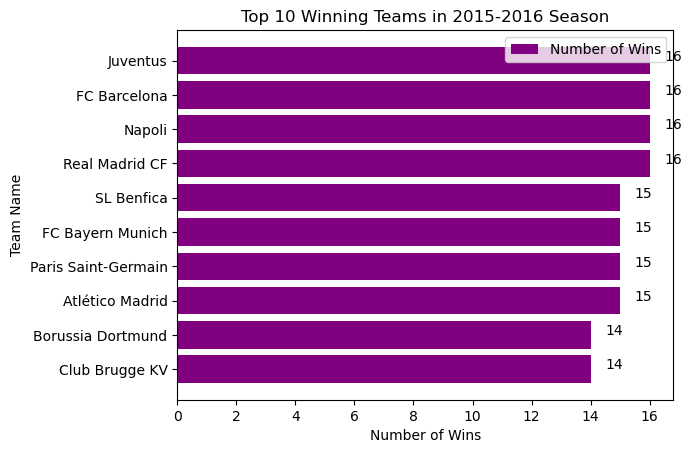

In [64]:
top_winners = Matches.query('start_season == 2015 and end_season == 2016 and home_team_name == winner')\
.groupby(['home_team_name','winner']).count()['id'].sort_values(ascending=False)[:10]\
.sort_values()

# Creating a graph

plt.barh(top_winners.index.get_level_values(0), top_winners.values, color='purple')
plt.xlabel('Number of Wins')
plt.ylabel('Team Name')
plt.title('Top 10 Winning Teams in 2015-2016 Season')
plt.legend(['Number of Wins'])

for i,v in enumerate(top_winners.values):
    plt.text(v + 0.5, i, str(v), color = 'black')

plt.show()

#### Q2. Which season had the most home and/or away goals over the seasons?

In [65]:
# Sum the number of goals - home and away goals with the start and end seasons

goals_per_season = Matches.groupby(['start_season', 'end_season'])['home_team_goal', 'away_team_goal'].sum()

In [66]:
away_goals = goals_per_season['away_team_goal']
away_goals

start_season  end_season
2008          2009          3665
2009          2010          3654
2010          2011          3701
2011          2012          3683
2012          2013          3986
2013          2014          3602
2014          2015          3842
2015          2016          4027
Name: away_team_goal, dtype: int64

In [67]:
home_goals = goals_per_season['home_team_goal']
home_goals

start_season  end_season
2008          2009          5007
2009          2010          4978
2010          2011          5048
2011          2012          5064
2012          2013          5053
2013          2014          4787
2014          2015          5055
2015          2016          5135
Name: home_team_goal, dtype: int64

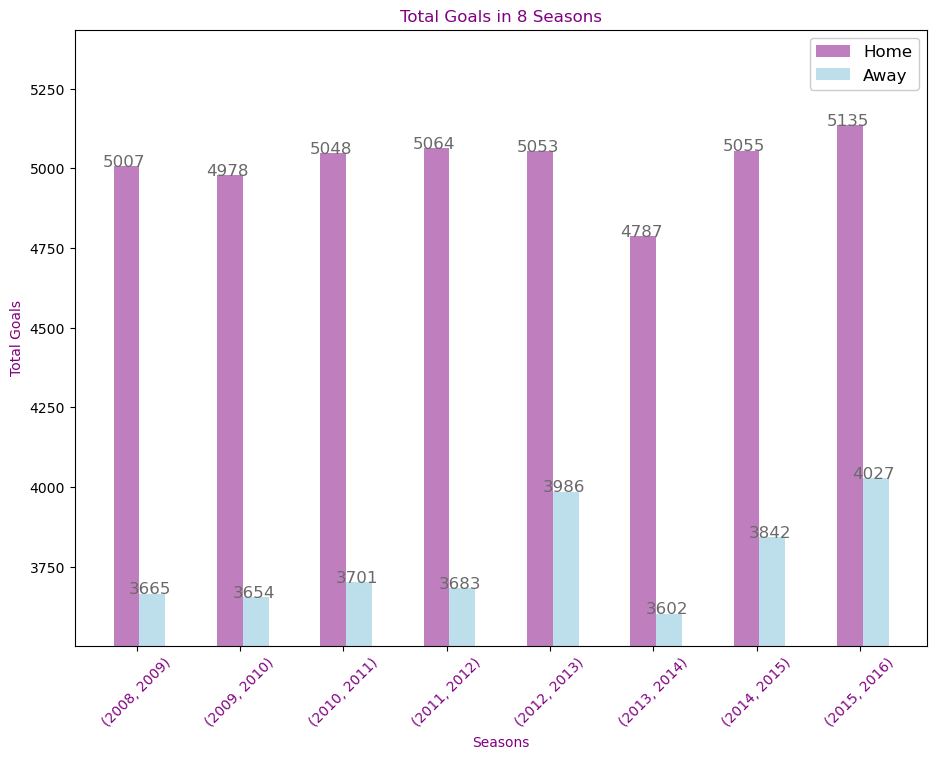

In [68]:
# Set the positions and width for the bars
width = 0.25
positions = goals_per_season.index.get_level_values(0)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(11, 8))

# Add a bar for total home goals per season
ax.bar(positions, home_goals, width, alpha=0.5, color='purple')

# Add a bar for away goals per season
ax.bar([i + width for i in positions], away_goals, width, alpha=0.8, color='lightblue')

# Set the y axis label
ax.set_ylabel('Total Goals', color='purple')

# Set the chart's title
ax.set_title('Total Goals in 8 Seasons', color='purple')

# Set the x axis label
ax.set_xlabel("Seasons", color='purple')

# Set the y-axis limits
plt.ylim(min(away_goals.min(), home_goals.min()) - 100, max(away_goals.max(), home_goals.max()) + 300)

# Set the position of the x ticks
ax.set_xticks([(p + 0.1) for p in positions])

# Set the position of the x tick labels and their rotation
ax.set_xticklabels(home_goals.index, rotation=45, color='purple')

# Set the text to each bar
for i in ax.patches:
    ax.text(i.get_x() - 0.1, i.get_height(), str(i.get_height()), fontsize=12, color='dimgrey')

# Add the legend
plt.legend(['Home', 'Away'], loc='best', fontsize=12, facecolor='white', framealpha=1)

# Show the plot
plt.show()

#### Q3. What Team Attributes leads to a Team's Victory?

In [69]:
match_season_df = Matches.query('start_season == 2015 and end_season == 2016')

In [70]:
winners = match_season_df.groupby('winner')['id'].count().sort_values(ascending = False)
winners[1:11]

winner
Paris Saint-Germain    30
SL Benfica             29
FC Barcelona           29
Juventus               29
Atlético Madrid        28
Real Madrid CF         28
FC Bayern Munich       28
Sporting CP            27
FC Basel               26
PSV                    26
Name: id, dtype: int64

In [71]:
team_att = pd.read_csv('Team_Attributes_Clean_Data.csv')
team_att.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR,2010
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2014
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2015
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE,2010
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE,2011


In [72]:
# Checking only columns with numerical data

columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',\
           'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',\
           'defencePressure', 'defenceAggression', 'defenceTeamWidth']

In [73]:
# Setting the names of ten winners

winners_ten = winners[1:11].index

In [74]:
# Quering only the year and the winners in the list

winner_stat = team_att.query('(year == 2015 or year == 2016) and team_long_name in @winners_ten')[columns]
winner_stat

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
99,Atlético Madrid,57,50.0,50,61,62,49,49,42,52
123,FC Barcelona,36,35.0,51,36,49,56,61,65,65
135,FC Basel,61,63.0,46,66,66,54,47,58,53
147,FC Bayern Munich,45,24.0,28,37,31,22,72,53,59
165,SL Benfica,69,55.0,53,65,66,54,60,57,54
629,Juventus,50,35.0,20,65,50,80,35,65,35
966,Paris Saint-Germain,49,47.0,34,62,61,35,57,53,56
1012,PSV,67,43.0,43,53,44,28,40,40,48
1053,Real Madrid CF,50,57.0,46,61,41,63,52,60,63
1197,Sporting CP,57,65.0,56,42,50,55,60,60,54


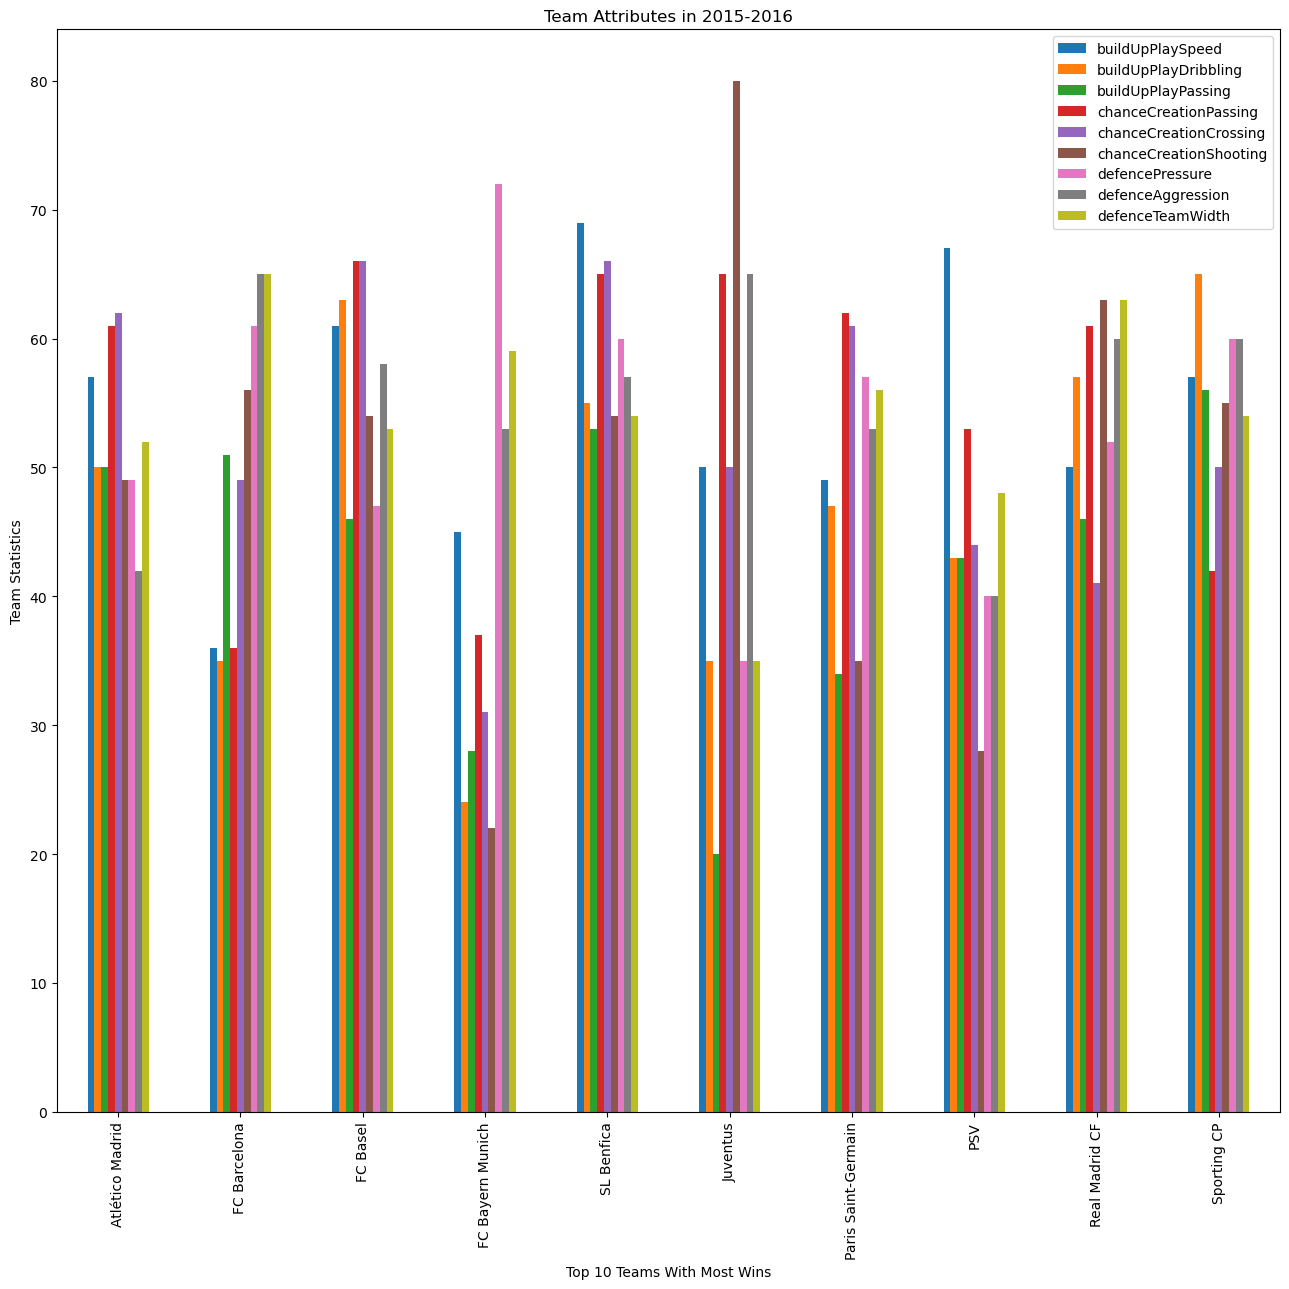

In [75]:
fig, ax = plt.subplots(figsize=(13, 13))

# create a new bar char
ax = winner_stat.plot.bar(ax=ax);

ax.set_xticklabels(winner_stat['team_long_name'], rotation=90)

# Set the y axis label
ax.set_ylabel('Team Statistics')

# Set the chart's title
ax.set_title('Team Attributes in 2015-2016')

# Set the y axis label 
plt.xlabel("Top 10 Teams With Most Wins")

plt.tight_layout();

In [76]:
# Creating Result column

# For Draw
df_Match['Result'] = df_Match['home_team_goal'] - df_Match['away_team_goal'] 
# For Home win
df_Match['Result'][df_Match['Result'] > 0 ] = 1 
# For Home loss
df_Match['Result'][df_Match['Result'] < 0] = -1 

#### Feature Creation: Team Form 

In [77]:
# Data Preprocessing

df_Match['stage'] = pd.to_datetime(df_Match['date']).dt.year
df_Match = df_Match.rename(columns= {'stage': 'date_year'})
df_Match['date'] = pd.to_datetime(df_Match['date'])

df_Player_Attributes['date']= pd.to_datetime(df_Player_Attributes['date']).dt.year
df_Team_Attributes['date']= pd.to_datetime(df_Team_Attributes['date']).dt.year

# Sorting the Match table by date

df_Match = df_Match.sort_values(by='date', ascending = True)

In [78]:
# Home Team Form Algorithm
## Results the sum of last 10 matches for the home team from the 'Result' column
def Form_Home_Team (df):
    
    team = df['home_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    score = last_matches['Result'].sum()
    return score

In [79]:
# Away Team Form Algorithm
## Results the sum of last 10 matches for the away team from the 'Result' column
def Form_Away_Team (df):
    
    team = df['away_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    score = last_matches['Result'].sum()
    return score

In [80]:
df_Match['Home_Team_Form'] = df_Match.apply(lambda x: Form_Home_Team(x),axis=1 )
df_Match['Away_Team_Form'] = df_Match.apply(lambda x: Form_Away_Team(x),axis=1 )

#### Feature Creation : Attacking Form 

In [81]:
# Creating function to get goals scored
## Results the goals scored by both the teams in previous matches 
def goals_scored_calc(df, team):
    
    home_goals = int(df['home_team_goal'][df['home_team_api_id'] == team].sum())
    away_goals = int(df['away_team_goal'][df['away_team_api_id'] == team].sum())
    total_goals = home_goals + away_goals
    return total_goals

In [82]:
# Home Team Attacking Form Algorithm
## Results home team goals scored in previous matches
def Home_Team_Goal_Scoring_Form (df):
    
    team = df['home_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_scored_calc(last_matches,team)

In [83]:
# Away Team Attacking Form Algorithm
## Results Away team goals scored in previous matches
def Away_Team_Goal_Scoring_Form (df):
    
    team = df['away_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_scored_calc(last_matches,team)

In [84]:
df_Match['Home_Team_Goal_Scoring_Form'] = df_Match.apply(lambda x: Home_Team_Goal_Scoring_Form(x),axis=1 )
df_Match['Away_Team_Goal_Scoring_Form'] = df_Match.apply(lambda x: Away_Team_Goal_Scoring_Form(x),axis=1 )

#### Feature Creation: Defensive Form

In [85]:
# Create function to get goals conceded by a team
## Returns the goals conceded by both the teams in previous matches
    
def goals_conceded_calc(df, team):
    home_goals_conceded = int(df['away_team_goal'][df['home_team_api_id'] == team].sum())
    away_goals_conceded = int(df['home_team_goal'][df['away_team_api_id'] == team].sum())
    total_goals_conceded = home_goals_conceded + away_goals_conceded
    return total_goals_conceded

In [86]:
# Home Team Defensive Form Algorithm
##  Returns the gols conceded by the home team in previous matches
def Home_Team_Defensive_Form (df):
    
    team = df['home_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_conceded_calc(last_matches,team)

In [87]:
# Away Team Defensive Form Algorithm
##  Returns the gols conceded by the away team in previous matches
def Away_Team_Defensive_Form (df):
    
    team = df['away_team_api_id']
    date = df['date']
    team_matches = df_Match[(df_Match['home_team_api_id'] == team) | (df_Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_conceded_calc(last_matches,team)

In [88]:
df_Match['Home_Team_Defensive_Form'] = df_Match.apply(lambda x: Home_Team_Defensive_Form(x),axis=1 )
df_Match['Away_Team_Defensive_Form'] = df_Match.apply(lambda x: Away_Team_Defensive_Form(x),axis=1 )

#### Feature Creation: Head to Head

In [89]:
# Home Team Form Algorithm
## Returns the sum of previous four matches between the two teams from the 'Result' column
def Head_to_Head (df):
    
    team1 = df['home_team_api_id']
    team2 = df['away_team_api_id']
    date = df['date']
    team_matches = df_Match[((df_Match['home_team_api_id'] == team1) & (df_Match['away_team_api_id'] == team2))|\
     ((df_Match['home_team_api_id'] == team2) & (df_Match['away_team_api_id'] == team1))]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:4,:]
    score = last_matches['Result'].sum()
    return score
    

In [90]:
# Adding the head to head features

df_Match['Head_to_Head'] = df_Match.apply(lambda x: Head_to_Head(x),axis=1 )

In [91]:
# Dropping columns
X_Y_player_indices = np.arange(df_Match.columns.get_loc("home_player_X1"),df_Match.columns.get_loc("away_player_Y11")+1,1)
df_Match = df_Match.drop(df_Match.columns[X_Y_player_indices], axis=1) 

# Dropping columns with no data 
df_Match = df_Match.drop(['goal','shoton','shotoff','foulcommit','card','cross','corner','possession',\
                   'match_api_id','season','id'], axis=1)

# Dropping rows with null values for Player Id
df_Match = df_Match.dropna(subset= ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5',\
                           'home_player_6','home_player_7','home_player_8','home_player_9','home_player_10',\
                           'home_player_11','away_player_1','away_player_2','away_player_3','away_player_4',
                           'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9',
                           'away_player_10','away_player_11'])

# Dropping duplicate player attributes for same year
df_Player_Attributes = df_Player_Attributes.drop_duplicates(subset=['player_api_id','date'])

# Dropping all odd bookies column except Bet 365
betting_odd_indice = np.arange(df_Match.columns.get_loc('B365H')+3,df_Match.columns.get_loc('BSA')+1,1)
df_Match = df_Match.drop(df_Match.columns[betting_odd_indice], axis=1)

#### Visualizing our Target Variable: Match Result

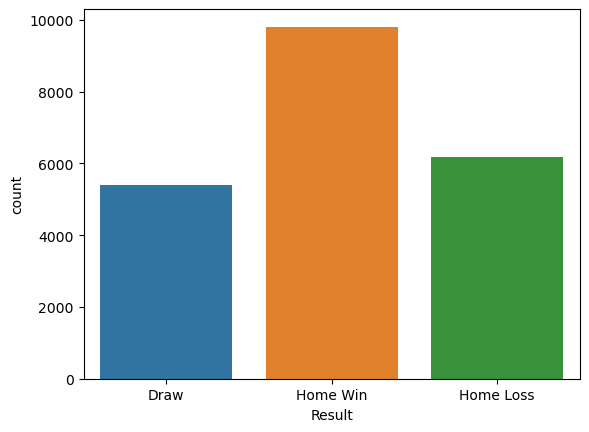

In [92]:
df_Match['Result'] = df_Match['Result'].replace([1,-1,0],['Home Win','Home Loss','Draw'])
sns.countplot(df_Match['Result'])
plt.show()
df_Match['Result'] = df_Match['Result'].replace(['Home Win','Home Loss','Draw'],[1,-1,0])

#### Player Attributes Exploration

In [93]:
df_Player_Attributes.describe()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,...,71615.000000,73059.000000,73059.000000,73059.000000,71615.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000
mean,92100.370317,161336.039201,126788.151261,2011.340095,67.446584,72.692646,53.498597,48.237685,56.383676,60.791388,...,57.200991,54.021407,46.490891,49.674783,47.513175,15.124434,17.611287,24.783586,17.683557,18.021298
std,53106.925473,56449.744436,133346.086777,2.907770,7.333027,6.778585,17.432631,19.202915,16.856317,14.633454,...,14.929767,15.750907,21.272933,21.446403,21.687854,17.517688,16.341745,23.368241,16.539693,17.636146
min,1.000000,2.000000,2625.000000,2007.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,46123.500000,148758.000000,33775.000000,2009.000000,63.000000,68.000000,43.000000,32.000000,48.000000,55.000000,...,48.000000,44.000000,25.000000,28.000000,25.000000,7.000000,9.000000,9.000000,9.000000,9.000000
50%,91845.000000,179873.000000,68861.000000,2011.000000,67.000000,73.000000,57.000000,51.000000,59.000000,64.000000,...,59.000000,56.000000,50.000000,55.000000,53.000000,10.000000,12.000000,12.000000,12.000000,12.000000
75%,138302.500000,198076.000000,181197.000000,2014.000000,72.000000,77.000000,66.000000,64.000000,68.000000,71.000000,...,68.000000,66.000000,65.000000,68.000000,66.000000,13.000000,21.000000,47.000000,21.000000,21.000000
max,183977.000000,234141.000000,750584.000000,2016.000000,94.000000,97.000000,95.000000,97.000000,95.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,92.000000,97.000000,96.000000,96.000000


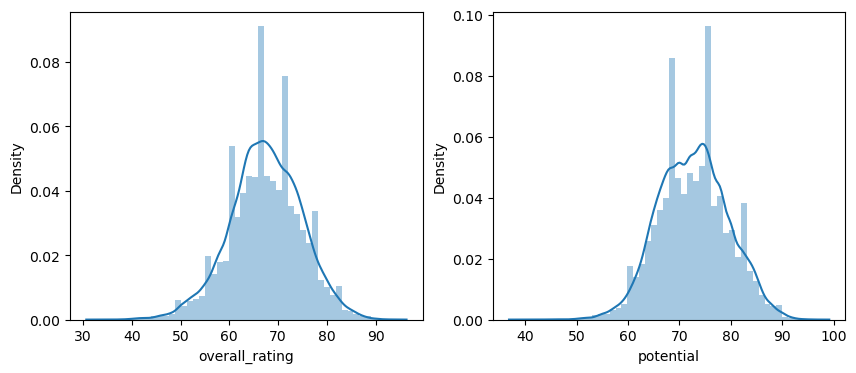

In [94]:
fig, ((ax1,ax2))=plt.subplots(ncols=2,nrows=1,figsize=(10,4))

sns.distplot(df_Player_Attributes['overall_rating'],ax=ax1);
sns.distplot(df_Player_Attributes['potential'],ax=ax2);

Goalkeeper Attributes:

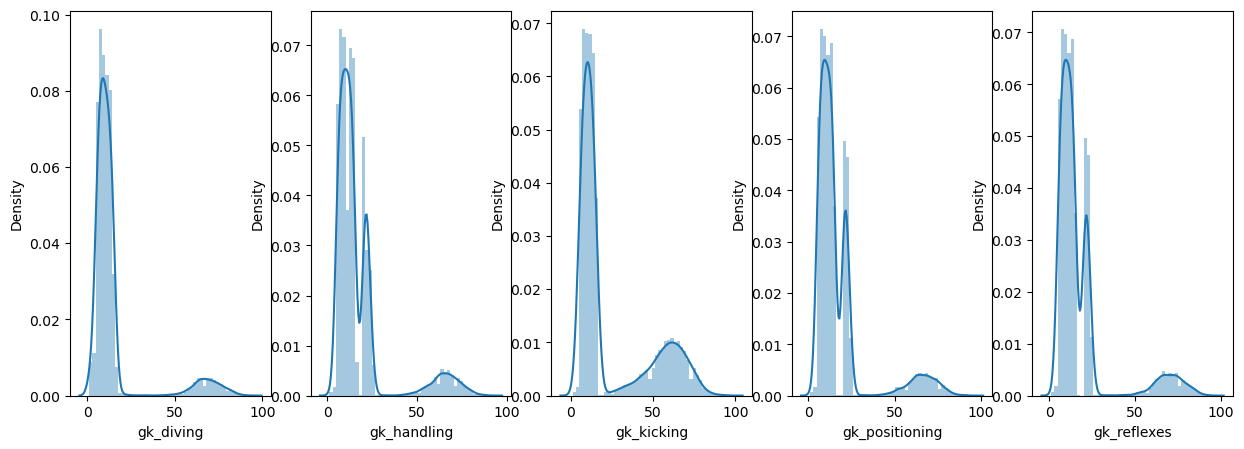

In [95]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(df_Player_Attributes['gk_diving'],ax=ax1);
sns.distplot(df_Player_Attributes['gk_handling'],ax=ax2);
sns.distplot(df_Player_Attributes['gk_kicking'],ax=ax3);
sns.distplot(df_Player_Attributes['gk_positioning'],ax=ax4);
sns.distplot(df_Player_Attributes['gk_reflexes'],ax=ax5);

Defensive Attributes:

<AxesSubplot:xlabel='interceptions', ylabel='Density'>

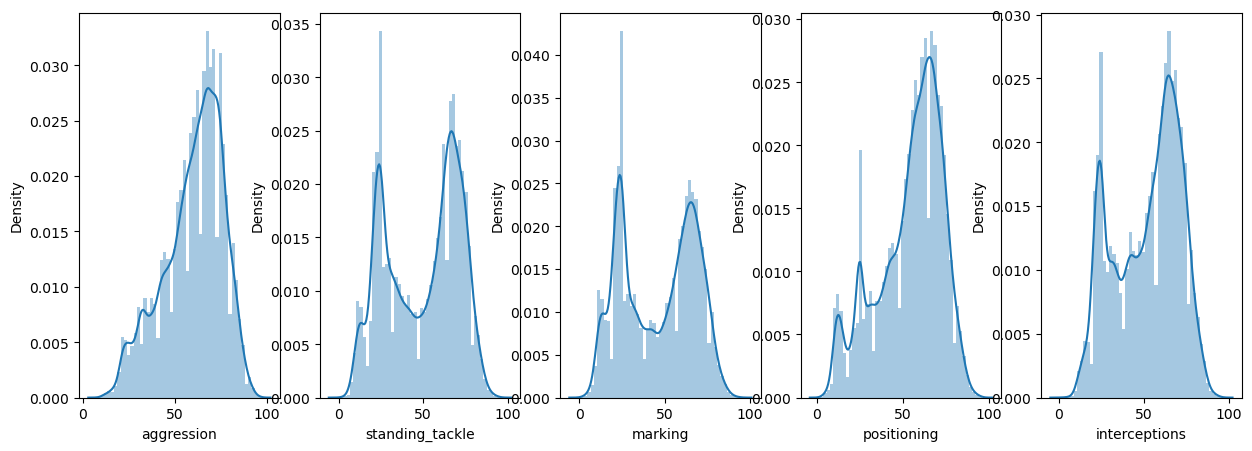

In [96]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(df_Player_Attributes['aggression'],ax=ax1);
sns.distplot(df_Player_Attributes['standing_tackle'],ax=ax2);
sns.distplot(df_Player_Attributes['marking'],ax=ax3);
sns.distplot(df_Player_Attributes['positioning'],ax=ax4);
sns.distplot(df_Player_Attributes['interceptions'],ax=ax5)

Midfielder Attributes:

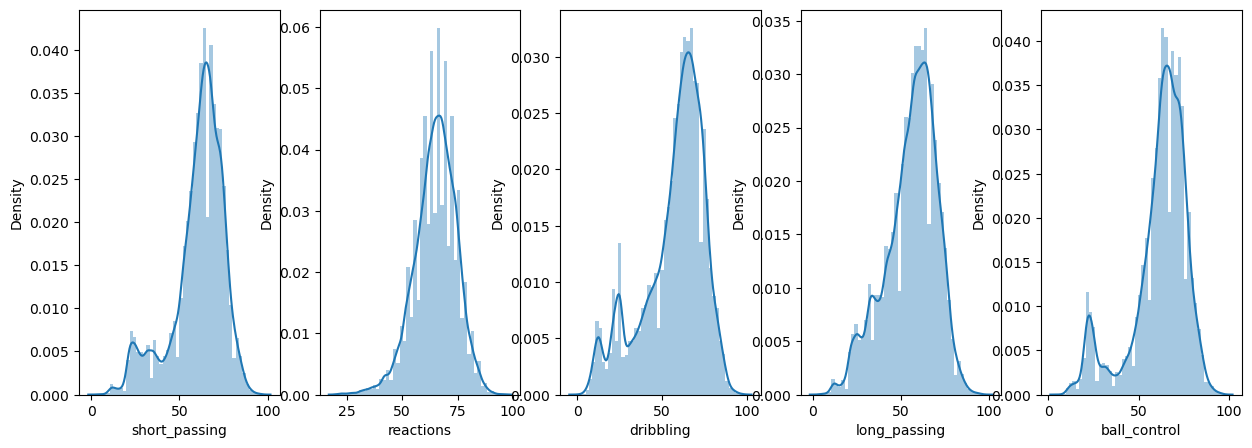

In [97]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(df_Player_Attributes['short_passing'],ax=ax1);
sns.distplot(df_Player_Attributes['reactions'],ax=ax2);
sns.distplot(df_Player_Attributes['dribbling'],ax=ax3);
sns.distplot(df_Player_Attributes['long_passing'],ax=ax4);
sns.distplot(df_Player_Attributes['ball_control'],ax=ax5);

Striker Attributes:

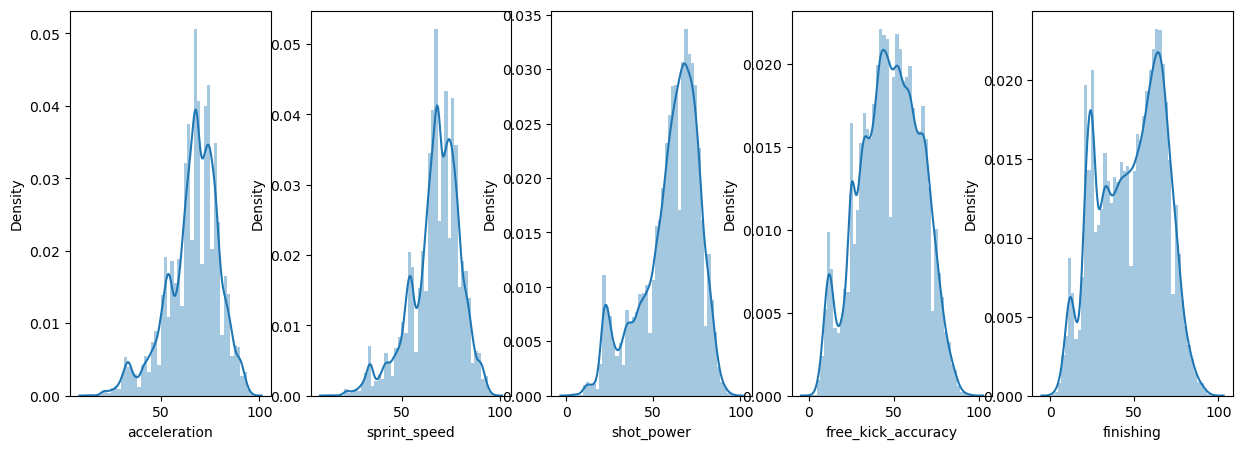

In [98]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(df_Player_Attributes['acceleration'],ax=ax1);
sns.distplot(df_Player_Attributes['sprint_speed'],ax=ax2);
sns.distplot(df_Player_Attributes['shot_power'],ax=ax3);
sns.distplot(df_Player_Attributes['free_kick_accuracy'],ax=ax4);
sns.distplot(df_Player_Attributes['finishing'],ax=ax5);

Breaking down Player Attribute by Players:

<ul>
 <li>Goalkeeper</li>
 <li>Defender</li>
 <li>Midfielder</li>
 <li>Striker</li>
</ul>

In [99]:
Player_Attributes_gk = df_Player_Attributes[['player_api_id','date','overall_rating','gk_diving']]

Player_Attributes_def = df_Player_Attributes[['player_api_id','date','overall_rating','positioning',\
                                           'interceptions']]

Player_Attributes_mid = df_Player_Attributes[['player_api_id', 'date', 'overall_rating', 'short_passing']]

Player_Attributes_str = df_Player_Attributes[['player_api_id', 'date', 'overall_rating', 'finishing','sprint_speed']]

Categorising Player Attributes by Years:

<ul>
        <li>2008-2011</li>
        <li>2012-2014</li>
        <li>2015-2016</li>
    </ul>
    

In [100]:
# Creating dataframes for goalkeepers by years

Player_Attributes_2008_2011_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2008) |
                                                      (Player_Attributes_gk['date']==2009) | 
                                                      (Player_Attributes_gk['date']==2010) | 
                                                      (Player_Attributes_gk['date']==2011)|
                                                     (Player_Attributes_gk['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


Player_Attributes_2012_2014_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2012) |
                                                      (Player_Attributes_gk['date']==2013) | 
                                                      (Player_Attributes_gk['date']==2014) |
                                                      (Player_Attributes_gk['date']==2015) ].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

    
Player_Attributes_2015_2016_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2014) |
                                                      (Player_Attributes_gk['date']==2015) |
                                                     (Player_Attributes_gk['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

In [101]:
# Creating dataframes for defender by years

Player_Attributes_2008_2011_def = Player_Attributes_def[(Player_Attributes_def['date']==2008) |
                                                      (Player_Attributes_def['date']==2009) | 
                                                      (Player_Attributes_def['date']==2010) | 
                                                      (Player_Attributes_def['date']==2011)|
                                                       (Player_Attributes_def['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


Player_Attributes_2012_2014_def = Player_Attributes_def[(Player_Attributes_def['date']==2012) |
                                                      (Player_Attributes_def['date']==2013) | 
                                                      (Player_Attributes_def['date']==2014)|
                                                      (Player_Attributes_def['date']==2015)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

                                                      
Player_Attributes_2015_2016_def = Player_Attributes_def[(Player_Attributes_def['date']==2014) |
                                                        (Player_Attributes_def['date']==2015) |
                                                        (Player_Attributes_def['date']==2016) ].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

In [102]:
# Creating dataframes for midfielder by years

Player_Attributes_2008_2011_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2008) |
                                                      (Player_Attributes_mid['date']==2009) | 
                                                      (Player_Attributes_mid['date']==2010) | 
                                                      (Player_Attributes_mid['date']==2011)|
                                                       (Player_Attributes_mid['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

Player_Attributes_2012_2014_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2012) |
                                                      (Player_Attributes_mid['date']==2013) | 
                                                      (Player_Attributes_mid['date']==2014) |
                                                       (Player_Attributes_mid['date']==2015)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])
                                                      
Player_Attributes_2015_2016_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2014) |
                                                      (Player_Attributes_mid['date']==2015) |
                                                       (Player_Attributes_mid['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

In [103]:
# Creating dataframes for striker by years

Player_Attributes_2008_2011_str = Player_Attributes_str[(Player_Attributes_str['date']==2008) |
                                                      (Player_Attributes_str['date']==2009) | 
                                                      (Player_Attributes_str['date']==2010) | 
                                                      (Player_Attributes_str['date']==2011)|
                                                        (Player_Attributes_str['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                    .drop_duplicates(subset=['player_api_id'])

Player_Attributes_2012_2014_str = Player_Attributes_str[(Player_Attributes_str['date']==2012) |
                                                      (Player_Attributes_str['date']==2013) | 
                                                      (Player_Attributes_str['date']==2014) |
                                                       (Player_Attributes_str['date']==2014)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id']) 
                                                      
Player_Attributes_2015_2016_str = Player_Attributes_str[(Player_Attributes_str['date']==2014) |
                                                      (Player_Attributes_str['date']==2015)| 
                                                       (Player_Attributes_str['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

In [104]:
# Creating dataframes and merging for Player Attributes  and Same Time Period 

Match_2008_2011 = df_Match[(df_Match['date_year']==2008)|(df_Match['date_year']==2009)| (df_Match['date_year']==2010)|
                       (df_Match['date_year']==2011)]

Match_2012_2014 = df_Match[(df_Match['date_year']==2012)| (df_Match['date_year']==2013)| (df_Match['date_year']==2014)]

Match_2015_2016  = df_Match[(df_Match['date_year']==2015)| (df_Match['date_year']==2016)]

In [105]:
# For Year 2008-2011 

# Home Player merges

Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')

# Away Player merges

Match_2008_2011 = Match_2008_2011.merge(Player_Attributes_2008_2011_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
Match_2008_2011 = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

In [106]:
# For Year 2012-2014 

# Home Player merges 

Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')

# Away Player merges

Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

In [107]:
# For Year 2015-2016

# Home Player merges

Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')

# Away Player merges

Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

#### Team Attributes Exploration

In [108]:
df_Team_Attributes.describe()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,2012.506859,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,1.709201,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,2010.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,2011.000000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,2013.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,2014.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,2015.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [109]:
# Dropping columns not required

df_Team_Attributes = df_Team_Attributes.drop(columns= (['id','team_fifa_api_id','buildUpPlaySpeedClass','buildUpPlayDribbling',\
                                                        'buildUpPlayPassingClass',\
                                                        'buildUpPlayPositioningClass','chanceCreationPassingClass',\
                                                        'chanceCreationCrossingClass','chanceCreationShootingClass',\
                                                        'chanceCreationPositioningClass','defencePressureClass',\
                                                        'defenceAggressionClass','defenceTeamWidthClass']))

In [110]:
#Encode categorical columns:

df_Team_Attributes = pd.get_dummies(df_Team_Attributes)

In [111]:
df_Team_Attributes = df_Team_Attributes.sort_values(by = 'date', ascending = False).drop_duplicates(subset=['team_api_id'])

In [112]:
# Merging Team Attributes to Match by position

Match_2008_2011 = Match_2008_2011.merge(df_Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2008_2011 = Match_2008_2011.merge(df_Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')
 
Match_2012_2014 = Match_2012_2014.merge(df_Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2012_2014 = Match_2012_2014.merge(df_Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')

Match_2015_2016 = Match_2015_2016.merge(df_Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2015_2016 = Match_2015_2016.merge(df_Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')

### Data Modeling

#### Splitting Training and Test Data

<ul>
    <li> Training data - Matches played between 2008 and 2014 </li>
    <li> Test data - Matches played between 2015 and 2016 </li>
</ul>    

In [113]:
Train_range = [Match_2008_2011,Match_2012_2014]
Test_range =  [Match_2015_2016]

Match_Train = pd.concat(Train_range)
print(f'Training data shape before dropping the null values: {Match_Train.shape}')

Match_Test = pd.concat(Test_range)
print(f'Test data shape before dropping the null values: {Match_Test.shape}')

Match_Train = Match_Train.dropna()
Match_Test = Match_Test.dropna()

print(f'Training data shape after dropping null values: {Match_Train.shape}')
print(f'Test data shape after dropping null values: {Match_Test.shape}')

Training data shape before dropping the null values: (16848, 171)
Test data shape before dropping the null values: (4526, 171)
Training data shape after dropping null values: (15457, 171)
Test data shape after dropping null values: (3978, 171)


In [114]:
# Dropping columns not required to be fed into the model

# Features and labels are after Result column

Train = (Match_Train.iloc[:,Match_Train.columns.get_loc('Result'):]).drop(['player_api_id_x','date_y',\
                                                                             'player_api_id_y','date_x',\
                                                                            'team_api_id_x','team_api_id_y',\
                                                                             'date'],1)


Test = (Match_Test.iloc[:,Match_Test.columns.get_loc('Result'):]).drop(['player_api_id_x','date_y',\
                                                                             'player_api_id_y','date_x',\
                                                                            'team_api_id_x','team_api_id_y',\
                                                                             'date'],1)

print(f'Training data shape after dropping unncessary columns: {Train.shape}')
print(f'Testing data shape after dropping unncessary columns: {Test.shape}')

Training data shape after dropping unncessary columns: (15457, 90)
Testing data shape after dropping unncessary columns: (3978, 90)


In [115]:
Train.head()

,Result,Home_Team_Form,Away_Team_Form,Home_Team_Goal_Scoring_Form,Away_Team_Goal_Scoring_Form,Home_Team_Defensive_Form,Away_Team_Defensive_Form,Head_to_Head,overall_rating_x,gk_diving_x,...,chanceCreationCrossing_y,chanceCreationShooting_y,defencePressure_y,defenceAggression_y,defenceTeamWidth_y,buildUpPlayDribblingClass_Little_y,buildUpPlayDribblingClass_Lots_y,buildUpPlayDribblingClass_Normal_y,defenceDefenderLineClass_Cover_y,defenceDefenderLineClass_Offside Trap_y
0,0,0,0,0,0,0,0,0,64.0,63.0,...,52.0,64.0,59.0,42.0,48.0,0.0,0.0,1.0,1.0,0.0
1,1,0,0,0,0,0,0,0,62.0,62.0,...,45.0,27.0,37.0,44.0,51.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,0,0,0,0,0,74.0,74.0,...,64.0,52.0,48.0,51.0,49.0,0.0,0.0,1.0,1.0,0.0
3,-1,0,0,0,0,0,0,0,74.0,77.0,...,50.0,50.0,45.0,45.0,50.0,1.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,0,0,68.0,12.0,...,61.0,35.0,57.0,53.0,56.0,0.0,0.0,1.0,1.0,0.0


In [116]:
Test.head()

,Result,Home_Team_Form,Away_Team_Form,Home_Team_Goal_Scoring_Form,Away_Team_Goal_Scoring_Form,Home_Team_Defensive_Form,Away_Team_Defensive_Form,Head_to_Head,overall_rating_x,gk_diving_x,...,chanceCreationCrossing_y,chanceCreationShooting_y,defencePressure_y,defenceAggression_y,defenceTeamWidth_y,buildUpPlayDribblingClass_Little_y,buildUpPlayDribblingClass_Lots_y,buildUpPlayDribblingClass_Normal_y,defenceDefenderLineClass_Cover_y,defenceDefenderLineClass_Offside Trap_y
0,0,5,3,12,9,13,13,0,65.0,67.0,...,57.0,47.0,63.0,62.0,58.0,1.0,0.0,0.0,1.0,0.0
1,1,-2,4,13,17,11,5,2,85.0,87.0,...,34.0,44.0,39.0,41.0,46.0,0.0,0.0,1.0,1.0,0.0
2,0,8,4,13,11,16,13,2,76.0,83.0,...,36.0,55.0,31.0,47.0,42.0,0.0,0.0,1.0,1.0,0.0
3,1,0,-4,22,8,7,10,1,77.0,80.0,...,50.0,55.0,47.0,45.0,49.0,0.0,0.0,1.0,1.0,0.0
4,0,2,-1,13,6,13,16,-1,78.0,82.0,...,64.0,46.0,58.0,65.0,55.0,0.0,0.0,1.0,1.0,0.0


In [117]:
x_train = Train.iloc[:,1:]
y_train = Train.iloc[:,0]
x_test = Test.iloc[:,1:]
y_test = Test.iloc[:,0]

### Logisitic Regression

In [118]:
# Creating a preprocessing object that includes StandardScaler features and PCA

preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA()),("F_value",SelectKBest(f_classif) )])

# Creating a pipeline
    
pipe = Pipeline([("preprocess", preprocess),
                  ("classifier", LogisticRegression())])

# Creating space of candidate values

search_space = [{"preprocess__pca__n_components": [85,80],
                 "preprocess__F_value__k": [80,85],
                 "classifier__penalty": [ "l1","l2"],
                 "classifier__C": np.logspace(-3, 2, 10)}]

# Creating grid search

log_reg_test = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

# Fiting the grid search

log_reg_test.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('std',
                                                                        StandardScaler()),
                                                                       ('pca',
                                                                        PCA()),
                                                                       ('F_value',
                                                                        SelectKBest())])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                          'classifier__penalty': ['l1', 'l2'],
                          'prepr

In [119]:
print(f'Logistic Regression grid search best parameters: {log_reg_test.best_params_}')

print(f'Logistic Regression grid search best cross validation score: {log_reg_test.best_score_}')

Logistic Regression grid search best parameters: {'classifier__C': 2.1544346900318843, 'classifier__penalty': 'l2', 'preprocess__F_value__k': 80, 'preprocess__pca__n_components': 85}
Logistic Regression grid search best cross validation score: 0.5418909717022629


In [120]:
estimators = [('normalise',StandardScaler()),
              ('logit', LogisticRegression(C= 0.001,solver='lbfgs'))]

pipe_1_LogR = Pipeline(estimators)

pipe_1_LogR.fit(x_train, y_train)

Pipeline(steps=[('normalise', StandardScaler()),
                ('logit', LogisticRegression(C=0.001))])

In [121]:
print(f'Best Logistic Regression score: {pipe_1_LogR.score(x_test, y_test)}')

Best Logistic Regression score: 0.5321769733534439


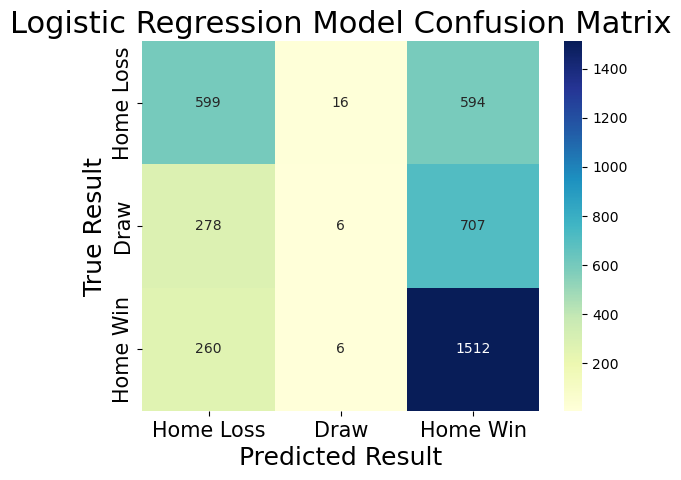

<Figure size 1600x900 with 0 Axes>

In [122]:
ax = plt.subplot();
confusion_log = confusion_matrix(y_test, pipe_1_LogR.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_log,annot =True,fmt='g',ax = ax, cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=18);
ax.set_ylabel('True Result',fontsize=18); 
ax.set_title('Logistic Regression Model Confusion Matrix',fontsize=22); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15); 
ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15);
plt.show();

### K-Nearest Neighbours

In [123]:
# Creating a preprocessing object that includes StandardScaler features and PCA

preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])

# Creating a pipeline
    
pipe = Pipeline([("preprocess", preprocess),
                 ("classifier", KNeighborsClassifier())])

# Creating space of candidate values

search_space = [{"preprocess__pca__n_components": [85,80],
                 "classifier__n_neighbors": list(range(15,18,21))}]

# Creating grid search

knn_test = GridSearchCV(pipe, search_space, cv=2, verbose=1, n_jobs=-1)

# Fiting the grid search

knn_test.fit(x_train,y_train)


Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('std',
                                                                        StandardScaler()),
                                                                       ('pca',
                                                                        PCA())])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier__n_neighbors': [15],
                          'preprocess__pca__n_components': [85, 80]}],
             verbose=1)

In [124]:
print(f'K-Nearest Neighbours grid search best parameters: {knn_test.best_params_}')

print(f'K-Nearest Neighbours grid search best cross validation score: {knn_test.best_score_}')

K-Nearest Neighbours grid search best parameters: {'classifier__n_neighbors': 15, 'preprocess__pca__n_components': 80}
K-Nearest Neighbours grid search best cross validation score: 0.4898106908668838


In [125]:
estimators = [('normalise',StandardScaler()),
              ('KNN', KNeighborsClassifier(n_neighbors=22))]

pipe_2_KNN = Pipeline(estimators)

pipe_2_KNN.fit(x_train, y_train)

Pipeline(steps=[('normalise', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=22))])

In [126]:
print(f'Best KNN score: {pipe_2_KNN.score(x_test, y_test)}')

Best KNN score: 0.5010055304172951


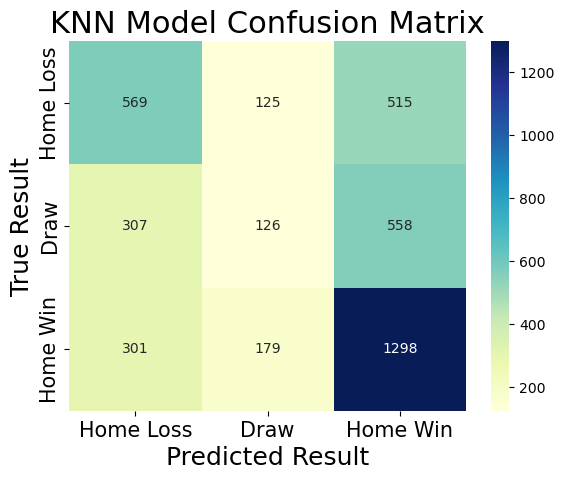

<Figure size 1600x900 with 0 Axes>

In [127]:
ax= plt.subplot();
confusion_KNN = confusion_matrix(y_test, pipe_2_KNN.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_KNN,annot =True,fmt='g',ax = ax,cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=18);
ax.set_ylabel('True Result',fontsize=18); 
ax.set_title('KNN Model Confusion Matrix',fontsize=22); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15);
ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15);
plt.show();

### Random Forest

In [128]:
# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [2, 4, 8, None],
              'min_samples_split': [2, 4, 8],
              'min_samples_leaf': [1, 2, 4]}

# Instantiate the Grid Search model
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid Search model to the training data
grid.fit(x_train, y_train)

# Print the best hyperparameters found by Grid Search
print(f"Best hyperparameters: {grid.best_params_}")

# Make predictions on the test data using the best model from Grid Search
y_pred = grid.predict(x_test)


Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}


In [129]:
# Print the best hyperparameters found by Grid Search
print(f"Random Forest grid search best parameters: {grid.best_params_}")

# Evaluate the model performance on the test data
score = grid.score(x_test, y_test)
print(f"Random Forest grid search best cross validation score: {score}")

Random Forest grid search best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Random Forest grid search best cross validation score: 0.5253896430367019


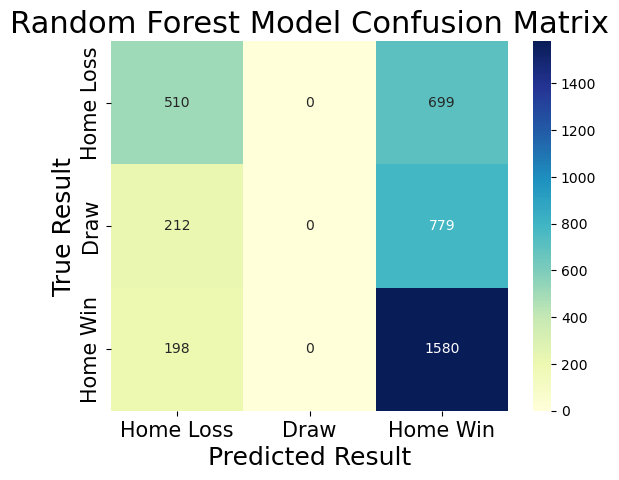

<Figure size 1600x900 with 0 Axes>

In [130]:
ax= plt.subplot();
confusion_RF = confusion_matrix(y_test, grid.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_RF,annot =True,fmt='g',ax = ax, cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=18);
ax.set_ylabel('True Result',fontsize=18); 
ax.set_title('Random Forest Model Confusion Matrix',fontsize=22); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15); 
ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=15);
plt.show();

### Linear Regression

In [131]:
# Instantiate the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Evaluate the model performance on the test data
score = lr.score(x_test, y_test)
print(f"R-squared score: {score}")

R-squared score: 0.1843016100432593


## Model Evaluation

In [132]:
scores = {"Logistic Regression": pipe_1_LogR.score(x_test, y_test),
            "KNN": pipe_2_KNN.score(x_test, y_test),
           "Random Forest": grid.score(x_test, y_test)
         }

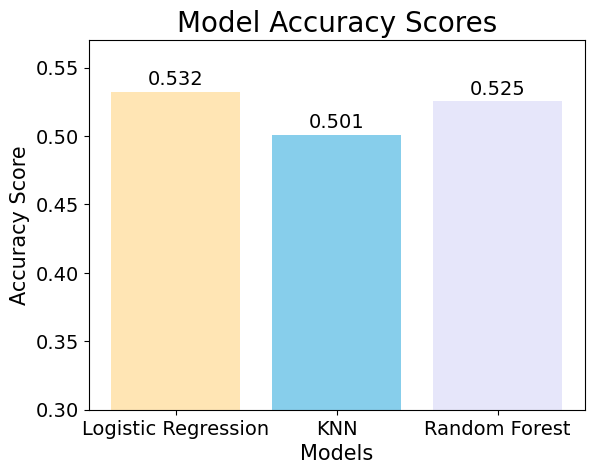

In [133]:
names = list(scores.keys())
values = list(scores.values())
plt.bar(0,values[0],tick_label=names[0],color='#FFE5B4')
plt.bar(1,values[1],tick_label=names[1],color='#87CEEB')
plt.bar(2,values[2],tick_label=names[2],color='#E6E6FA')
plt.xticks(range(0,3),names)
plt.ylim(0.30, 0.57)
plt.title("Model Accuracy Scores", fontsize=20)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Adding labels to the bars
plt.text(0, values[0]+0.005, str(round(values[0],3)), ha='center', fontsize=14)
plt.text(1, values[1]+0.005, str(round(values[1],3)), ha='center', fontsize=14)
plt.text(2, values[2]+0.005, str(round(values[2],3)), ha='center', fontsize=14)

plt.show()

### Model Accuracy vs the Bookies Accuracy

In [134]:
# Merging the Leauge name to Match for per leauge analysis

Match_Test_Leagues =  Match_Test.merge(df_League, how = 'left', left_on='league_id', right_on='id')

# Renaming the 'name' column to League

Match_Test_Leagues = Match_Test_Leagues.rename(columns={'name': 'League'})

# Adding a column of ones to total matches 

Match_Test_Leagues['Total Matches'] = np.where(Match_Test_Leagues.index.notnull(),1,0) 

In [135]:
# Function to check the bookies prediction and score if they are correct 

# Return 1 is for a corrected prediction result and 0 is for an incorrect predictioned result for the bookies

def bookies_checker (df):
    
    Result = df['Result']    
    # list to append the bookies implied probability  
    probabilities = []       
    # append the probabilities in ORDER of home loss/ away win, draw, home win 
    
    probabilities.append((100/df['B365A'])/100)     
    probabilities.append((100 / df['B365D'])/100)   
    probabilities.append((100 / df['B365H'])/100) 
    
    # checking the INDEX of the highest probability in list and impute implied predicted result accordingly. 
    # if index of highest probability is 0 then prediction is home loss -1
    # if index of highest probability is 1 then prediction is home draw 0
    # else if index of highest probability is 2 then prediction is home win 1
    
    if (probabilities.index(max(probabilities)) == 0): 
        bookies_prediction = -1
    elif (probabilities.index(max(probabilities)) == 1):
        bookies_prediction = 0
    else:
        bookies_prediction = 1                    
    
    # Check actual result to bookies prediction and return
    
    if bookies_prediction == Result:
        correct_prediction = 1
    else:
        correct_prediction = 0
    
    
    return correct_prediction

In [136]:
# Predicted result by Logistic model

Match_Test_Leagues['Model_Prediction'] = pipe_1_LogR.predict(x_test)

In [137]:
# Function to calculate whether the model prediction was correct

def model_checker (df):
    
    Result = df['Result']   
    
    Model_prediction = df['Model_Prediction']
    
    if Result == Model_prediction:
        model_correct = 1
    else:
        model_correct = 0
    
    return model_correct

In [138]:
# Creating columns for bookies and models score

Match_Test_Leagues['Bookies_score'] = Match_Test_Leagues.apply(lambda x: bookies_checker(x), axis =1)
Match_Test_Leagues['Model_score'] = Match_Test_Leagues.apply(lambda x: model_checker(x), axis =1)

In [139]:
Match_Test_Leagues_plot = Match_Test_Leagues.groupby(['League']).agg({'Bookies_score':sum, 'Model_score':sum,
                                         'Total Matches':sum})

In [140]:
Match_Test_Leagues_plot

,Bookies_score,Model_score,Total Matches
League,,,
Belgium Jupiler League,153,153,291
England Premier League,275,279,564
France Ligue 1,270,272,530
Germany 1. Bundesliga,244,242,459
Italy Serie A,270,287,537
Netherlands Eredivisie,235,239,422
Portugal Liga ZON Sagres,184,181,337
Scotland Premier League,163,164,300
Spain LIGA BBVA,304,300,538


In [141]:
Match_Test_Leagues_accuracy_plot = Match_Test_Leagues_plot.copy()

In [142]:
Match_Test_Leagues_accuracy_plot['Bookies accuracy'] = Match_Test_Leagues_accuracy_plot['Bookies_score'] / Match_Test_Leagues_accuracy_plot['Total Matches']
Match_Test_Leagues_accuracy_plot['Model accuracy'] = Match_Test_Leagues_accuracy_plot['Model_score'] / Match_Test_Leagues_accuracy_plot['Total Matches']

In [143]:
Match_Test_Leagues_accuracy_plot = Match_Test_Leagues_accuracy_plot[['Bookies accuracy','Model accuracy']]

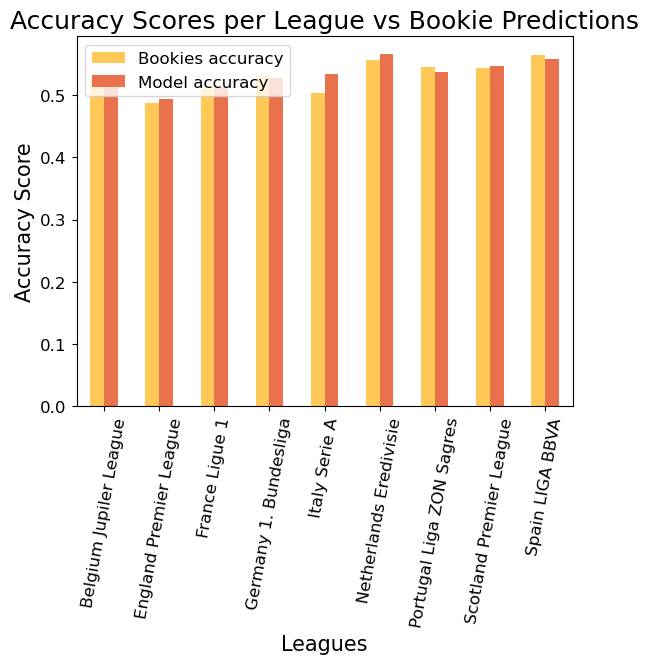

In [144]:
Match_Test_Leagues_accuracy_plot.plot(kind='bar',color=['#FFC857', '#E9724C'])
plt.title("Accuracy Scores per League vs Bookie Predictions", fontsize=18)
plt.xlabel('Leagues', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.legend(loc=2, prop={'size': 12})


plt.show()

In [145]:
Basis_point_increase = (round(10000*(Match_Test_Leagues_plot['Model_score'].sum()\
                             /Match_Test_Leagues_plot['Total Matches'].sum()- \
                             Match_Test_Leagues_plot['Bookies_score'].sum()\
                             /Match_Test_Leagues_plot['Total Matches'].sum()),2))

print(f'Model accuracy is greater than bookies accuracy by {Basis_point_increase} basis points')

Model accuracy is greater than bookies accuracy by 47.76 basis points


## Conclusion

Using a combination of FIFA statistics and engineered features, we have built the model to predict the outcomes of the soccer matches. Here, the model with the highest accuracy score on the test match dataset was Logistic Regression model, next was Random Forest and then K-Nearest Neighbors model. While comparing the model accuracy and the bookies accuracy, we found that our model accuracy is greater than the bookies accuracy by 47.76 basis points.